In [6]:
import anndata
import scanpy as sc
from sklearn import metrics
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px

adata = anndata.read_h5ad(filename='Tutorial/all_adatas/151669_adata.h5ad')


In [7]:
print(adata)


AnnData object with n_obs × n_vars = 3636 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'slices_path', 'Ground_Truth', 'mclust'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ARI', 'Ground_Truth_colors', 'hvg', 'log1p', 'mclust_colors', 'neighbors', 'spatial'
    obsm: 'adj', 'combined_feat', 'distance_matrix', 'emb', 'emb_pca', 'feat_a', 'graph_neigh', 'image_feat', 'label_CSL', 'spatial'
    obsp: 'connectivities', 'distances'


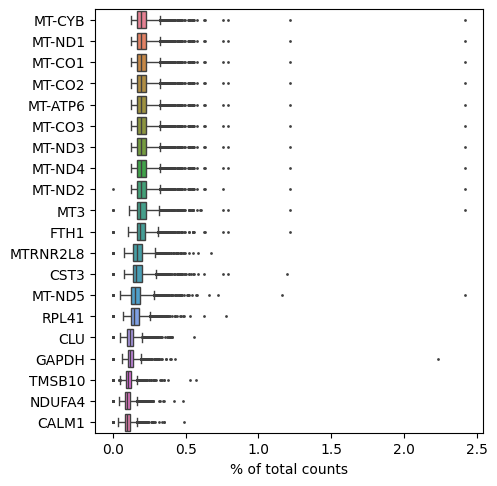

In [8]:

sc.pl.highest_expr_genes(adata, n_top=20)


In [9]:
cell_index = 0
gene_expression = adata.X[cell_index]
expressed_gene_indices = gene_expression.nonzero()[1]
expressed_genes = adata.var_names[expressed_gene_indices]
print(expressed_genes)

Index(['PERM1', 'ISG15', 'AGRN', 'UBE2J2', 'DVL1', 'AURKAIP1', 'MRPL20',
       'SSU72', 'AL691432.2', 'GNB1',
       ...
       'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5',
       'MT-ND6', 'MT-CYB', 'AC007325.4'],
      dtype='object', length=2813)


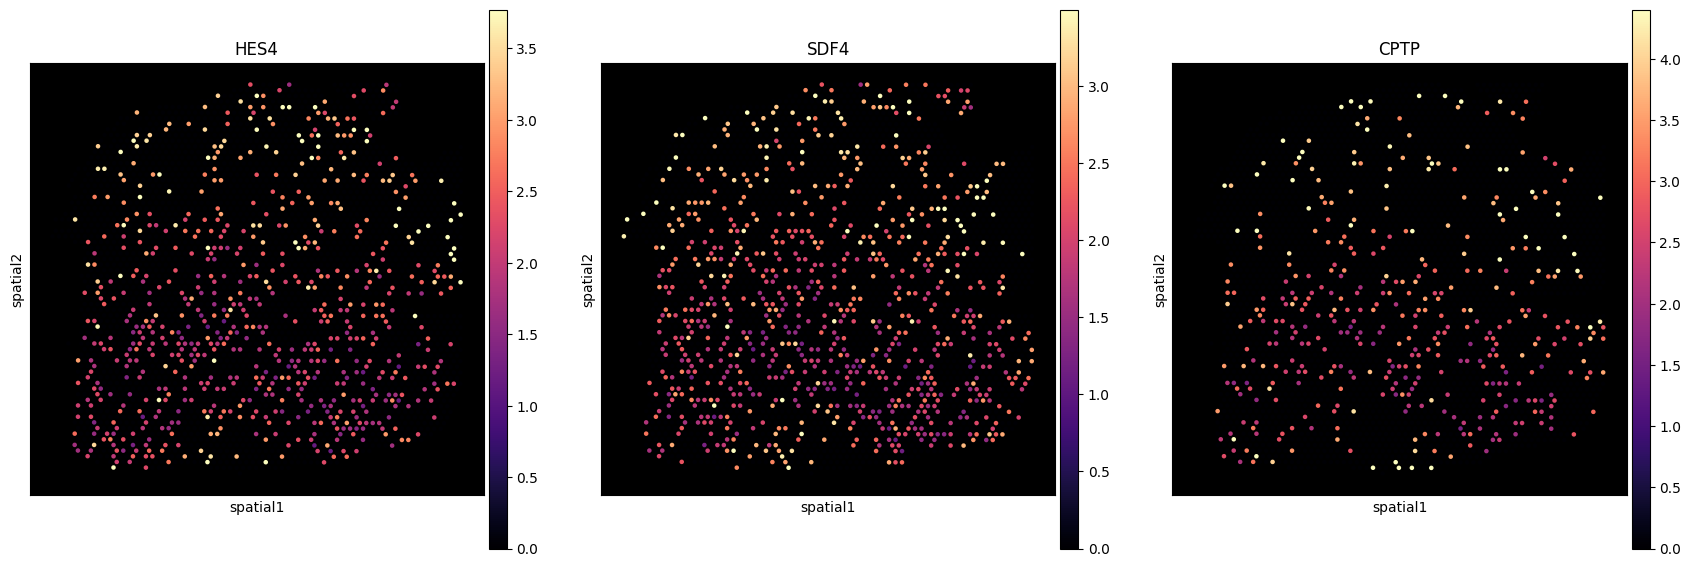

In [10]:
with mpl.rc_context({'figure.figsize': [6, 7], 'axes.facecolor': 'black'}):
    sc.pl.spatial(adata,
                  color=[ "HES4","SDF4", "CPTP"],
                  img_key=None,
                  size=1,
                  vmin=0,
                  cmap='magma',
                  vmax='p99.0',
                  gene_symbols='SYMBOL'
                 )

In [11]:
gene_counts_sum = np.sum(adata.X, axis=0)
gene_with_most_counts = adata.var_names[np.argmax(gene_counts_sum)]
print("Gene with the most counts:", gene_with_most_counts)

Gene with the most counts: MT-ND1


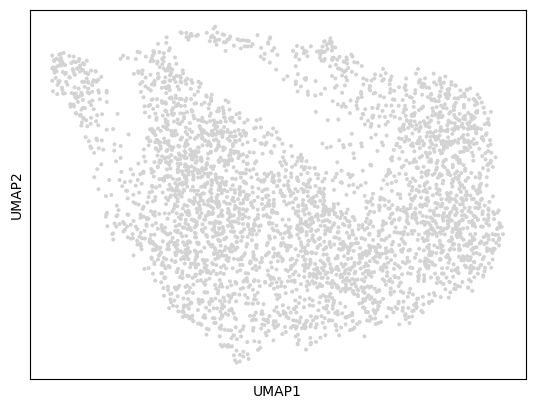

In [12]:
sc.tl.umap(adata, n_components=2)
sc.pl.umap(adata)

In [13]:
sc.tl.diffmap(adata)


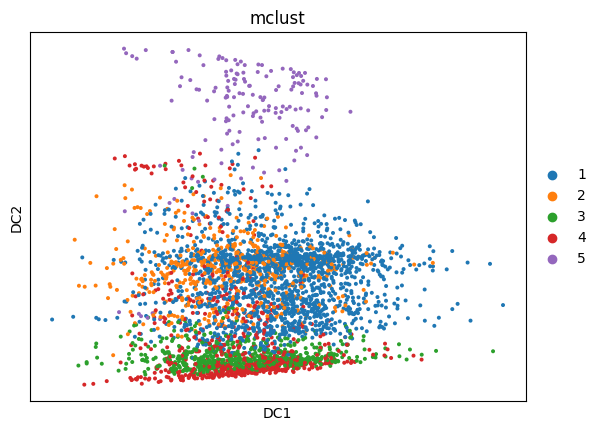

In [14]:
sc.pl.diffmap(adata, color='mclust')


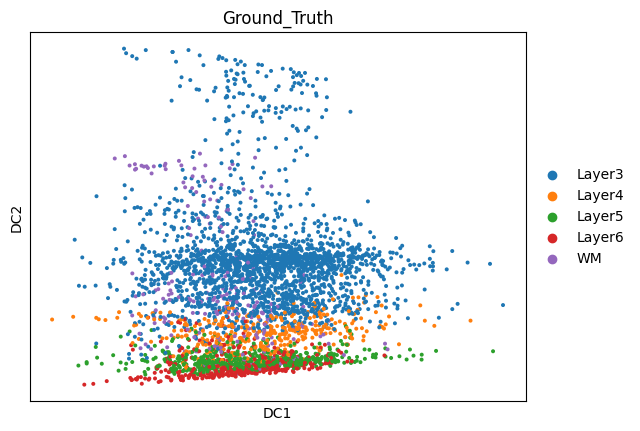

In [15]:
sc.pl.diffmap(adata, color='Ground_Truth')


In [16]:
sc.tl.draw_graph(adata)


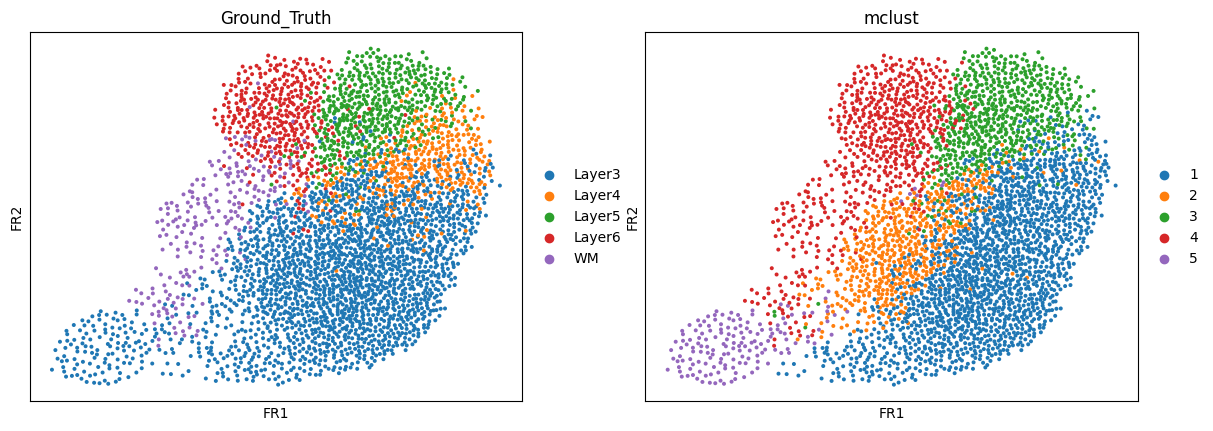

In [17]:
sc.pl.draw_graph(adata, color=['Ground_Truth', 'mclust'])


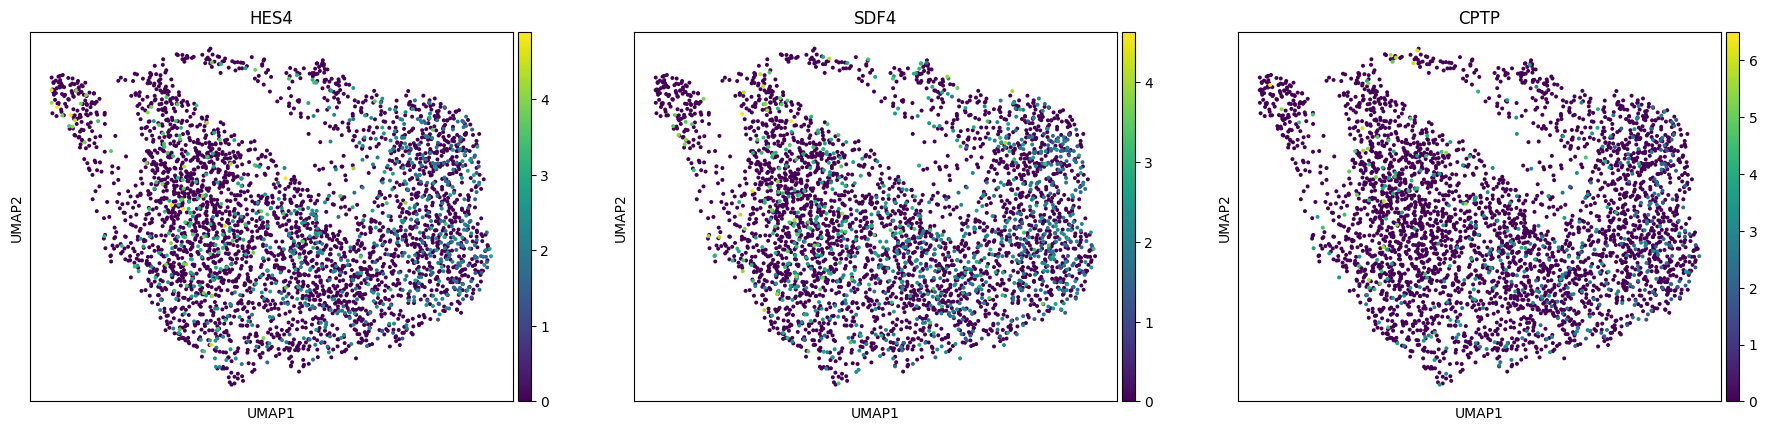

In [18]:
sc.pl.umap(adata, color=["HES4", "SDF4", "CPTP"])


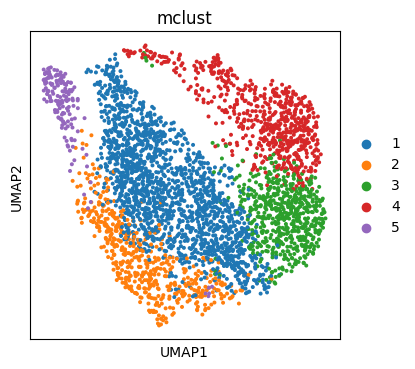

In [19]:

plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["mclust"], wspace=0.4)

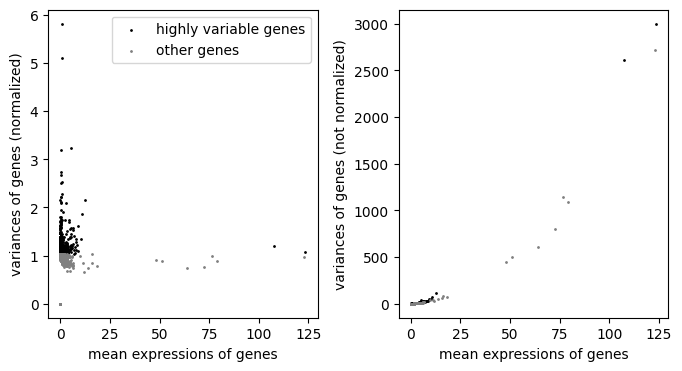

In [20]:
sc.pl.highly_variable_genes(adata)


In [21]:
sc.pp.pca(adata)

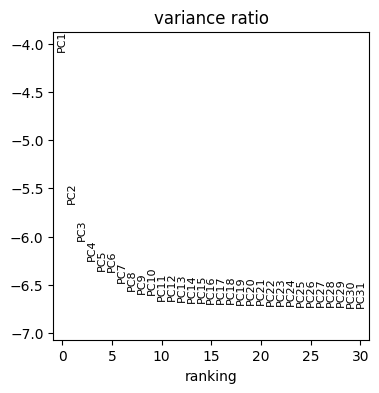

In [22]:
sc.pl.pca_variance_ratio(adata, log=True)


In [23]:
sc.tl.rank_genes_groups(adata, "mclust", method="t-test")

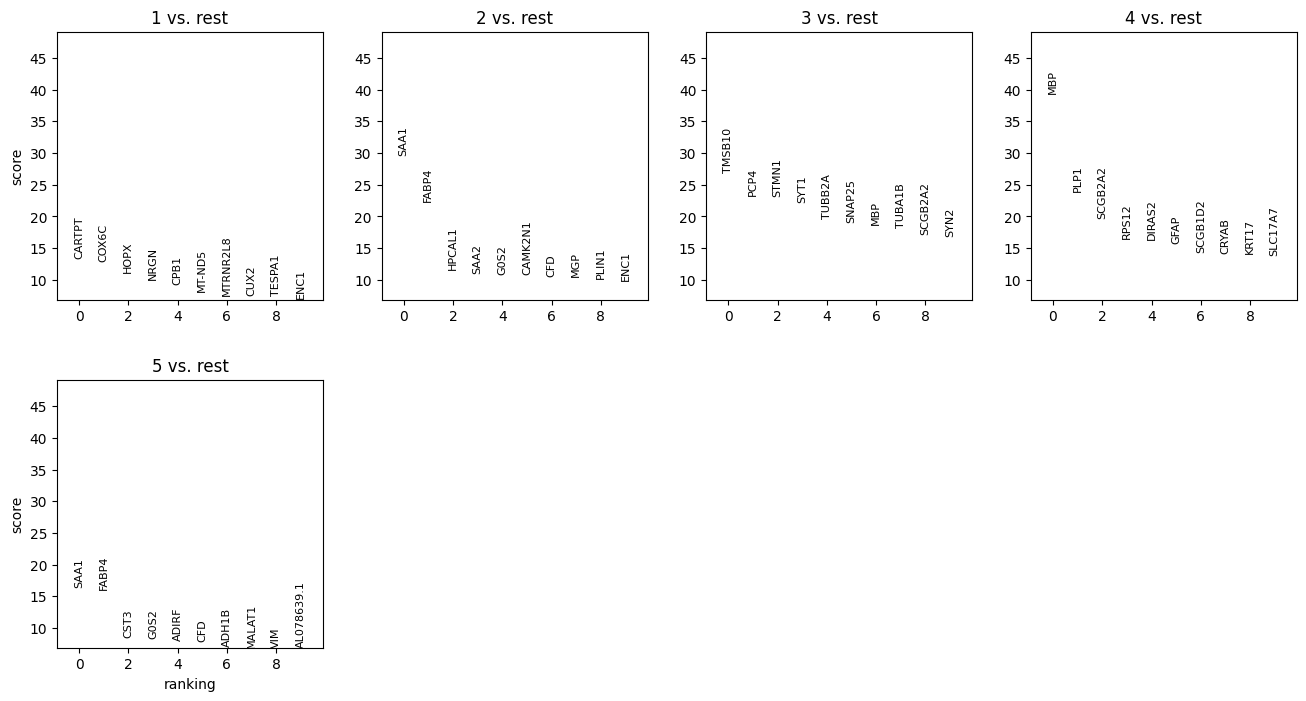

In [24]:
sc.pl.rank_genes_groups(adata, n_genes=10)


In [25]:
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top_features = {}
n_top_genes = 10
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]

for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 1 top features:
CARTPT
COX6C
HOPX
NRGN
CPB1
MT-ND5
MTRNR2L8
CUX2
TESPA1
ENC1

Cluster 2 top features:
SAA1
FABP4
HPCAL1
SAA2
G0S2
CAMK2N1
CFD
MGP
PLIN1
ENC1

Cluster 3 top features:
TMSB10
PCP4
STMN1
SYT1
TUBB2A
SNAP25
MBP
TUBA1B
SCGB2A2
SYN2

Cluster 4 top features:
MBP
PLP1
SCGB2A2
RPS12
DIRAS2
GFAP
SCGB1D2
CRYAB
KRT17
SLC17A7

Cluster 5 top features:
SAA1
FABP4
CST3
G0S2
ADIRF
CFD
ADH1B
MALAT1
VIM
AL078639.1



In [26]:

embedding = adata.obsm['emb_pca']
mclust_labels = adata.obs["mclust"]

fig = px.scatter_3d(
    embedding,
    x=0,
    y=1,
    z=2,
    color=mclust_labels,
    title="3D Embedding with GENESPAT",
)

fig.show()


In [27]:

embedding = adata.obsm['emb_pca']
mclust_labels = adata.obs["Ground_Truth"]

fig = px.scatter_3d(
    embedding,
    x=0,
    y=1,
    z=2,
    color=mclust_labels,
    title="3D Embedding with Ground Truth Clustering",
)

fig.show()


In [28]:
import plotly.express as px
from kaleido.scopes.plotly import PlotlyScope

embedding = adata.obsm['emb_pca']
mclust_labels = adata.obs["mclust"]

fig = px.scatter_3d(
    embedding,
    x=0,
    y=1,
    z=2,
    color=mclust_labels,
    title="3D Embedding with GENESPAT",
)

fig.write_html("3d_embedding.html")

fig.show()

scope = PlotlyScope()
img_bytes = scope.transform(fig, format="png", width=800, height=600, scale=2.0)
with open("3d_embedding.png", "wb") as f:
    f.write(img_bytes)


In [29]:
ARI = metrics.adjusted_rand_score(adata.obs['mclust'], adata.obs['Ground_Truth'])
adata.uns['ARI'] = ARI
print('ARI:', ARI)

ARI: 0.44258988028505725


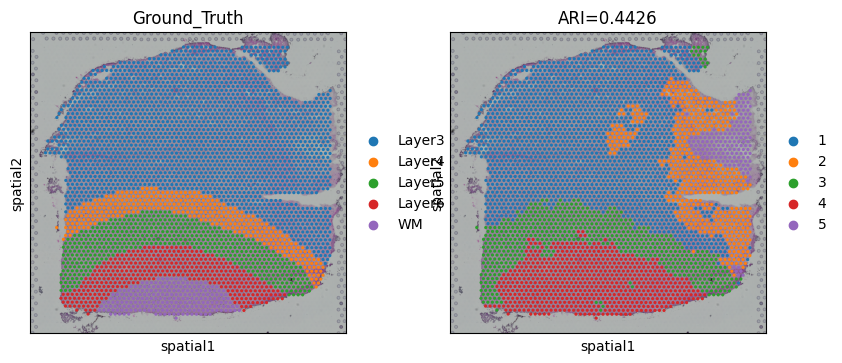

In [30]:
sc.pl.spatial(adata,
              img_key="hires",
              color=["Ground_Truth", "mclust"],
              title=["Ground_Truth", "ARI=%.4f"%ARI],
              show=True)